# Exercice 2: Manipulation d'une base de données simple
O. Kaufmann 2018, 2025.

***
## 1. Initialisation du notebook

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

<div class="alert alert-block alert-success">
	<b>1.1 Chargement de l'extension sql pour jupyter</b>
</div>

Charger l'extension de Jupyter pour traiter SQL

In [2]:
%load_ext sql

<div class="alert alert-block alert-success">
	<b>1.2 Imports python</b>
</div>

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from eralchemy import render_er
from IPython.display import Image

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <i>matplotlib</i> sert à créer des graphiques au départ de données  <br>
    <i>pandas</i> sert à manipuler des tableaux
</div>

<div class="alert alert-block alert-success">
	<b>1.3 Chargement d'une base de donnée sqlite3</b>
</div>

Création d'une copie pour éviter d'écraser la base de données fournie

In [4]:
! cp ./example_db.db ./example_2_db.db

Chargement de la copie de la base de données

In [5]:
%sql sqlite:///example_2_db.db

***
## 2. Afficher le schéma de la base de données sous forme graphique

<div class="alert alert-block alert-info">
<b>Info:</b><br>     render_er crée un fichier image au format ".png" du schéma de la base de données qui est ensuite affiché dans le notebook avec la méthode Image().<br>
    Il est aussi possible de générer un schéma dans un fichier image vectoriel au format ".svg" (Scalable Vector Graphics). Le fichier ainsi créé peut être affiché avec la méthode SVG(). 
</div>

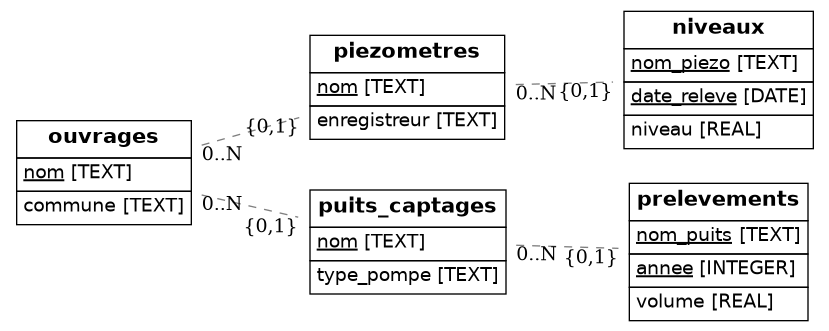

In [6]:
render_er('sqlite:///example_2_db.db', 'example_2_db_schema.png')
Image(filename='example_2_db_schema.png')

***
## 3. Insérer des données

<div class="alert alert-block alert-success">
	<b>3.1 Insertions simples</b>
</div>

Insertion de l'ouvrage A situé à Beloeil dans la table des ouvrages

In [7]:
%%sql
INSERT INTO ouvrages VALUES('A','Beloeil');

 * sqlite:///example_2_db.db
1 rows affected.


[]

<b>Note:</b><br>    Les noms des champs ne sont pas explicités dans cette requête simple, il est préférable de les expliciter...


In [8]:
%%sql
INSERT INTO ouvrages ('nom','commune') VALUES ('B','Mons');

 * sqlite:///example_2_db.db
1 rows affected.


[]

<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>Insérer le fait que la pompe installée dans le captage A est du type RK822W
</div>

In [9]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2573716c20494e5345525420494e544f2070756974735f63617074616765732028276e6f6d272c27747970655f706f6d706527292056414c55455320282741272c27524b3832325727293b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:

%%display_prompt --title Question 3.1.2: --prompt 56c3a972696669657220717565206c27696e666f726d6174696f6e2061206269656e20c3a974c3a920616a6f7574c3a9650a202020200a --answer 202020203c636f64653e53454c454354202a2046524f4d2070756974735f63617074616765733b3c2f636f64653e
# @info: Exécutez-moi pour afficher la question

Question 3.1.2: Vérifier que l'information a bien été ajoutée

<div class="alert alert-block alert-success">
	<b>3.2 Effacer un enregistrement et ceux qui y sont liés en cascade</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.2.1: </b><br>Supprimer l'ouvrage 'A'
</div>

In [11]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2573716c2044454c4554452046524f4d206f75767261676573205748455245206e6f6d3d2741273b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 3.2.2: </b><br>Ecrire une requête pour vérifier que les mécanismes de l'integrité référentielle ont bien fonctionné
</div>

<div class="alert alert-block alert-success">
	<b>3.3 Insertion d'un plus grand nombre de valeurs</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.3.1: </b><br>Insérer les données suivantes dans la table ouvrages :
     <table>
      <tr>
        <th>nom</th>
        <th>commune</th>
      </tr>
      <tr>
        <td>C</td>
        <td>Quevaucamps</td>
      </tr>
      <tr>
        <td>D</td>
        <td>Ciply</td>
      </tr>
      <tr>
        <td>E</td>
        <td>Hyon</td>
      </tr>
    </table> 
    
</div>

In [13]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2573716c20494e5345525420494e544f206f757672616765732056414c55455320282743272c202751756576617563616d707327292c20282744272c20274369706c7927292c20282745272c202748796f6e27293b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 3.3.2: </b><br>Vérifier que l'insertion a bien été réalisée
</div>

***
## 4. Pour aller un peu plus loin...

<div class="alert alert-block alert-success">
	<b>4.1 Afficher la liste des tables de la base de données</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Dans SQlite, la table sqlite_master est une table particulière dans laquelle les informations relatives au schéma de la base de données sont stockées<br>
</div>  
</div>

<div class="alert alert-block alert-warning">
<b>Question 4.1.1: </b><br>Affichez le nom de chaque table et la requête SQL utilisée pour la créer
</div>

In [15]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2573716c2053454c454354206e616d652c2073716c2046524f4d2073716c6974655f6d617374657220574845524520747970653d277461626c6527204f52444552204259206e616d653b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:

%%display_prompt --title Question 4.1.2: --prompt 5175277920612d742d696c20636f6d6d6520617574726520696e666f726d6174696f6e2073746f636bc3a96520c3a02070726f706f7320646573207461626c65732064616e732073716c6974655f6d61737465723f0a0a --answer 202020200a202020204573736179657a206c612072657175c3aa746520200a202020203c636f64653e53454c454354202a2046524f4d2073716c6974655f6d61737465723b3c2f636f64653e
# @info: Exécutez-moi pour afficher la question

Question 4.1.2: Qu'y a-t-il comme autre information stockée à propos des tables dans sqlite_master?